## Submitted by: Rahul Aggarwal
### For Prithvi AI Internship Assessment.
### Date of Submission: 12th May 2020

#### Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam

c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\rahul\appd

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

DataSet Link = "https://bit.ly/2LkegSf"

#### Loading Dataset

In [5]:
list_of_lists = []

with open('data_1600_accel_phone.txt') as f:
    for line in f:
        inner_list = [line.strip() for line in line.split(',')]
        list_of_lists.append(inner_list)

In [6]:
columns = ['user','activity','timestamp','x','y','z']

In [7]:
df = pd.DataFrame(list_of_lists, columns = columns)

df['z'] = df['z'].str.replace(';','')
print(df.head())

   user activity        timestamp            x          y           z
0  1600        A  252207666810782  -0.36476135   8.793503   1.0550842
1  1600        A  252207717164786   -0.8797302   9.768784   1.0169983
2  1600        A  252207767518790    2.0014954   11.10907    2.619156
3  1600        A  252207817872794   0.45062256  12.651642  0.18455505
4  1600        A  252207868226798   -2.1643524  13.928436  -4.4224854


In [8]:
df.info()  #Checking the types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64311 entries, 0 to 64310
Data columns (total 6 columns):
user         64311 non-null object
activity     64311 non-null object
timestamp    64311 non-null object
x            64311 non-null object
y            64311 non-null object
z            64311 non-null object
dtypes: object(6)
memory usage: 2.9+ MB


In [9]:
df.isnull().sum() # If any columns is having null value

user         0
activity     0
timestamp    0
x            0
y            0
z            0
dtype: int64

In [9]:
df['activity'].value_counts() # Value count of each Activity

# Note : These alphabets refers to different activities, see pdf attached for better understanding

L    3576
A    3574
P    3574
J    3573
K    3573
M    3573
Q    3573
G    3573
R    3573
F    3573
C    3573
S    3572
D    3572
O    3572
B    3572
H    3572
E    3572
I    3571
Name: activity, dtype: int64

#### Balanced Data

In [10]:
df['x'] = df['x'].astype('float')
df['y'] = df['y'].astype('float')
df['z'] = df['z'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64311 entries, 0 to 64310
Data columns (total 6 columns):
user         64311 non-null object
activity     64311 non-null object
timestamp    64311 non-null object
x            64311 non-null float64
y            64311 non-null float64
z            64311 non-null float64
dtypes: float64(3), object(3)
memory usage: 2.9+ MB


In [12]:
df = df.drop(['user','timestamp'], axis = 1) #Removing unwanted columns
df.tail()

,activity,x,y,z
64306,S,-2.372223,9.242722,-1.588287
64307,S,-2.046921,10.032288,-1.229935
64308,S,-1.393539,9.883896,-0.479248
64309,S,-1.230454,9.315079,-0.155701
64310,S,-2.154221,9.777359,-0.624542


#### Converting letters to actual activity names in the data

In [13]:
df['activity'] = df['activity'].str.replace('A','Walking')
df['activity'] = df['activity'].str.replace('B','Jogging')
df['activity'] = df['activity'].str.replace('C','Stairs')
df['activity'] = df['activity'].str.replace('D','Sitting')
df['activity'] = df['activity'].str.replace('E','Standing')
df['activity'] = df['activity'].str.replace('F','Typing')
df['activity'] = df['activity'].str.replace('G','Brushing Teeth')
df['activity'] = df['activity'].str.replace('H','Eating Soup')
df['activity'] = df['activity'].str.replace('I','Eating Chips')
df['activity'] = df['activity'].str.replace('J','Eating Pasta')
df['activity'] = df['activity'].str.replace('K','Drinking from cup')
df['activity'] = df['activity'].str.replace('L','Eating Sandwich')
df['activity'] = df['activity'].str.replace('M','Kicking')
df['activity'] = df['activity'].str.replace('O','Playing Catch')
df['activity'] = df['activity'].str.replace('P','Dribbling')
df['activity'] = df['activity'].str.replace('Q','Writing')
df['activity'] = df['activity'].str.replace('R','Clapping')
df['activity'] = df['activity'].str.replace('S','Folding Cloth')

#### Getting equal number of samples for each activity

In [14]:
Walking = df[df['activity'] == 'Walking'].head(3571).copy()
Jogging = df[df['activity'] == 'Jogging'].head(3571).copy()
Stairs = df[df['activity'] == 'Stairs'].head(3571).copy()
Sitting = df[df['activity'] == 'Sitting'].head(3571).copy()
Standing = df[df['activity'] == 'Standing'].head(3571).copy()
Typing = df[df['activity'] == 'Typing'].head(3571).copy()
Brushing_Teeth = df[df['activity'] == 'Brushing Teeth'].head(3571).copy()
Eating_Soup = df[df['activity'] == 'Eating Soup'].head(3571).copy()
Eating_Chips = df[df['activity'] == 'Eating Chips'].head(3571).copy()
Eating_Pasta = df[df['activity'] == 'Eating Pasta'].head(3571).copy()
Drinking_from_cup = df[df['activity'] == 'Drinking from cup'].head(3571).copy()
Eating_Sandwich = df[df['activity'] == 'Eating Sandwich'].head(3571).copy()
Kicking = df[df['activity'] == 'Kicking'].head(3571).copy()
Playing_Catch = df[df['activity'] == 'Playing Catch'].head(3571).copy()
Dribbling = df[df['activity'] == 'Dribbling'].head(3571).copy()
Writing = df[df['activity'] == 'Writing'].head(3571).copy()
Clapping = df[df['activity'] == 'Clapping'].head(3571).copy()
Folding_Cloth = df[df['activity'] == 'Folding Cloth'].head(3571).copy()



In [15]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking,Jogging,Stairs,Sitting,Standing,Typing,Brushing_Teeth,Eating_Soup,Eating_Chips,
                                      Eating_Pasta,Drinking_from_cup, Eating_Sandwich,Kicking,Playing_Catch,Dribbling,
                                      Writing,Clapping,Folding_Cloth])

In [16]:
balanced_data.shape

(35710, 4)

In [18]:
balanced_data['activity'].value_counts()

Brushing Teeth       3571
Writing              3571
Kicking              3571
Folding Cloth        3571
Drinking from cup    3571
Clapping             3571
Eating Chips         3571
Walking              3571
Dribbling            3571
Typing               3571
Name: activity, dtype: int64

In [17]:
balanced_data.head()

,activity,x,y,z
0,Walking,-0.364761,8.793503,1.055084
1,Walking,-0.879730,9.768784,1.016998
2,Walking,2.001495,11.109070,2.619156
3,Walking,0.450623,12.651642,0.184555
4,Walking,-2.164352,13.928436,-4.422485


#### Preprocessing with Label Encoder

In [18]:
label = LabelEncoder()

In [19]:
balanced_data['label'] = label.fit_transform(balanced_data['activity'])

In [20]:
label.classes_

array(['Brushing Teeth', 'Clapping', 'Dribbling', 'Drinking from cup',
       'Eating Chips', 'Folding Cloth', 'Kicking', 'Typing', 'Walking',
       'Writing'], dtype=object)

#### Standardize Data

In [22]:
X = balanced_data[['x','y','z']]
Y = balanced_data['label']

In [23]:
scaler = StandardScaler()

In [26]:
X = scaler.fit_transform(X)
print(X.shape)

Scaled_X = pd.DataFrame(data = X, columns = ['x','y','z'])
Scaled_X['label'] = Y.values
Scaled_X

(35710, 3)


,x,y,z,label
0,-0.347516,0.326339,-0.596406,8
1,-0.520656,0.748341,-0.609677,8
2,0.448054,1.328279,-0.051396,8
3,-0.073372,1.995746,-0.899747,8
4,-0.952564,2.548212,-2.505098,8
5,-1.681620,2.302766,-1.214552,8
6,-0.332279,2.284233,-1.044907,8
7,0.301786,0.638647,-0.970251,8
8,-0.333726,-1.201446,-0.851735,8
9,-0.833989,-1.873060,-0.485302,8


### Frame Preparation
#### Taking a bunch of Data instead of single values for training

In [32]:
import scipy.stats as stats

In [33]:
fs = 20
frame_size = fs*4  # Number of samples to be taken at once
hop_size = fs*2    # After what sample number, next data needs to be taken

In [43]:
def get_frames(df, frame_size, hop_size):
    
    N_features = 3
    
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):  
        x = df['x'].values[i:i + frame_size]
        y = df['y'].values[i:i + frame_size]
        z = df['z'].values[i:i + frame_size]
        
        label = stats.mode(df['label'][i : i+ frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, N_features)
    labels = np.asarray(labels)
    
    return frames,labels

In [44]:
X, Y = get_frames(Scaled_X, frame_size, hop_size)

In [45]:
X.shape , Y.shape # Shape has changed as we have converted data into  frames now (35710/40 = 891)

((891, 80, 3), (891,))

#### Splitting the Data

In [46]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [47]:
X_train.shape , X_test.shape

((712, 80, 3), (179, 80, 3))

In [48]:
# Reshaping for CNN as it takes 3 dimensional data

X_train = X_train.reshape(712,80,3,1)
X_test = X_test.reshape(179,80,3,1)

In [49]:
X_train[0].shape

(80, 3, 1)

#### 2D CNN Model

In [50]:
model = Sequential()

model.add(Conv2D(16, (2,2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2,2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

In [51]:
model.compile(optimizer=Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [52]:
result = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test), verbose = 1)

Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 1s 2ms/step - loss: 1.8308 - acc: 0.3020 - val_loss: 1.1706 - val_acc: 0.5531
Epoch 2/10
712/712 [==============================] - 1s 717us/step - loss: 1.1488 - acc: 0.5716 - val_loss: 0.5023 - val_acc: 0.9050
Epoch 3/10
712/712 [==============================] - 1s 706us/step - loss: 0.5784 - acc: 0.8258 - val_loss: 0.1767 - val_acc: 0.9665
Epoch 4/10
712/712 [==============================] - 0s 692us/step - loss: 0.3957 - acc: 0.8610 - val_loss: 0.1299 - val_acc: 0.9721
Epoch 5/10
712/712 [==============================] - 0s 701us/step - loss: 0.2905 - acc: 0.9045 - val_loss: 0.1110 - val_acc: 0.9665
Epoch 6/10
712/712 [==============================] - 1s 719us/step - loss: 0.2370 - acc: 0.9115 - val_loss: 0.0994 - val_acc: 0.9721
Epoch 7/10
712/712 [==============================] - 0s 679us/step - loss: 0.1959 - acc: 0.9284 - val_loss: 0.0653 - val_acc: 0.9777
Epoch 8/10
712/712

#### Confusion Matrix

In [53]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix

In [54]:
y_pred = model.predict_classes(X_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x149862fe780>)

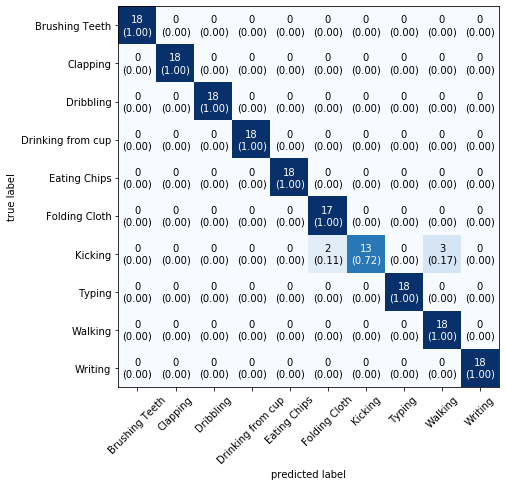

In [55]:
mat = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(conf_mat = mat, class_names = label.classes_, show_normed = True, figsize = (7,7))

### Thank you !